## Business Understanding

Stack overflow Developer Survey organized every year last 10 years. This survey has been done in different countries and this survey has been done by different age group.  These are the questions, which I am going to answer based on recent survey which was happened in 2020:


Q.1. What are the Languages which has been used mostly in all over the world?

Q.2. What are the top 10 countries who took this survey?

Q.3. What are the Languages which has been used mostly in India?


## Data Understanding


## Mount Drive Data

In [3]:
# mount drive data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/Colab Notebooks/StackOverflowSurveyData'

## Load Packages

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load StackOverflow Survery File for 2020.

In [18]:
# Load Survey Data using Pandas
df = pd.read_csv(base_path+'/survey_results_public.csv', error_bad_lines=False)
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [19]:
# Prints information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

There is no null values.

In [8]:
# Gives rows and columns count
df.shape

(64461, 61)

## Data Preprocessing

In [21]:
# Find all the Missing values in dataframe
df.isnull().sum()

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

In [22]:
df['LanguageWorkedWith'].isnull().sum()

7083

### Handle Missing Data

*   Removing the row or column value
*   Imputation - Fill up the data by mean or forward value.



In [29]:
new_df = df.dropna(how='any')

In [30]:
new_df['LanguageWorkedWith'].isnull().sum()

0

## Data Analysis

### Q.1 Most Langugae worked with in 2020.

In [31]:
# Create a new list having all the unique language
lang_lists = new_df["LanguageWorkedWith"].str.split(';', expand=True)
lang_lists.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
9,HTML/CSS,Java,JavaScript,Python,SQL,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
32,HTML/CSS,JavaScript,TypeScript,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
41,Bash/Shell/PowerShell,C#,HTML/CSS,Java,JavaScript,Python,None,None,None,None,None,None,None,None,None,None,None,None,None,None
46,Bash/Shell/PowerShell,C#,Java,JavaScript,Python,Ruby,SQL,None,None,None,None,None,None,None,None,None,None,None,None,None
68,HTML/CSS,Python,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [32]:
# Get counts of languages used 
top_langugae_2020 = lang_lists.stack().value_counts()

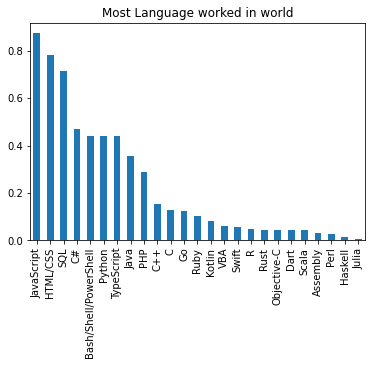

In [36]:
# Plot the bar chart with the title
(top_langugae_2020/new_df.shape[0]).plot(kind="bar", title="Most Language worked in world");

#### Analysis for Above Question -
*   JavaScript has the highest rated language in 2020 which is around 60%.
*   Julia is the most downrated language in 2020 which is below 1%.

### Q.1. Top 10 countries from where Survey has done.

In [34]:
# Get the unique count of all countries
country_val = new_df['Country'].value_counts()

In [35]:
country_val

United States                  1089
United Kingdom                  324
Germany                         266
India                           229
Brazil                          176
                               ... 
Saudi Arabia                      1
United Republic of Tanzania       1
Luxembourg                        1
Bhutan                            1
Cameroon                          1
Name: Country, Length: 123, dtype: int64

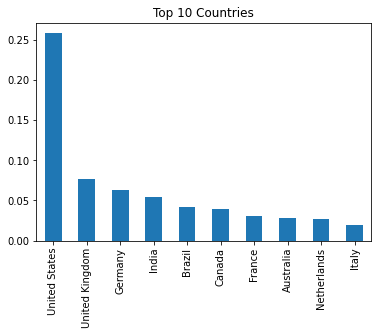

In [37]:
# Show the top 10 countries in bar chart
(country_val[:10]/new_df.shape[0]).plot(kind="bar", title="Top 10 Countries");

#### Analysis for Top Countires in world: 

*   There are total 183 countries who participated in this survey.
*   United States is the top country from which we have received major surveys amongst all other countries.
*India is the second top who has taken this survey.





### Q.2 Most Languages worked in India.

In [38]:
# Filter the dataframe for country India and split all the languages
lang_lists_india = new_df[new_df["Country"] == "India"]["LanguageWorkedWith"].str.split(';', expand=True)
lang_lists_india.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
622,HTML/CSS,JavaScript,TypeScript,None,None,None,None,None,None,None,None,None,None
2042,C,C++,HTML/CSS,Java,JavaScript,SQL,TypeScript,None,None,None,None,None,None
3218,JavaScript,Ruby,None,None,None,None,None,None,None,None,None,None,None
3635,Java,JavaScript,SQL,TypeScript,None,None,None,None,None,None,None,None,None
5737,Python,None,None,None,None,None,None,None,None,None,None,None,None


In [39]:
# get all the unique counts for most language used in India
top_langugae_india_2020 = lang_lists_india.stack().value_counts()

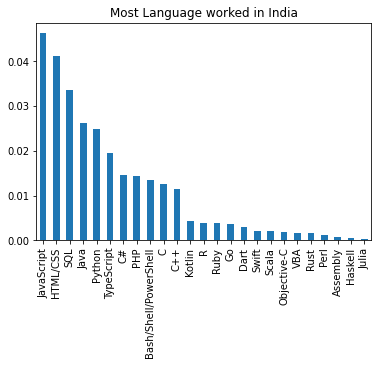

In [40]:
# Show the bar chart for Most language used in India
(top_langugae_india_2020/new_df.shape[0]).plot(kind="bar", title="Most Language worked in India");

#### Analyis for above Question:
India is the second top who did this survey and If we see the most language has been worked in India. It is again the same Javascript.